Research Question : We are going to recommend best ML algorithm for Sentimental Anlaysis and performance evaluation like accuracy . Comparison of three ML algorithms

1) Read the data set : Read the Json and convert into Dataframe using pandas
2) Rating Column : Converting the Overal rating columns into three categories ( 0(bad), 1 (neutral), 2(Positive)
3) Preprocessing the data : tokenize
4) Navie Bayes Algorithm
5) KMenas
6) SVM 

conclusion : Among three ML , SVM is the best choice for this type of dataset for doing sentimental Analysis. 
Future Work : we can further include deep learnings algorithms in Sentimental Anlaysis 

In [1]:
#Read the Dataset 
import pandas as pd
dataset=pd.read_json("reviews_Electronics_40.json",orient="records")
#get the Data structure of the json file
dataset_shape=dataset.shape
print("They are" ,dataset_shape[0], "rows in the json file")
print("They are" ,dataset_shape[1], "columns in the json file")
dataset.head()

They are 40000 rows in the json file
They are 9 columns in the json file


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [2]:
#Fetching 10000 Rows from the Data Frame
dataset=dataset[:10000]

In [3]:
#Fetching Overall and ReviewText Columns
#we have two columns from main dataset , which is required to analysis the data using ML algorithms
sensored_data=pd.DataFrame({"rating":dataset['overall'],"review_text":dataset['reviewText']});
sesnoreddata_shape=sensored_data.shape
print("There are" ,sesnoreddata_shape[1], "columns in the json file")
sensored_data.head()

There are 2 columns in the json file


,rating,review_text
0,5,We got this GPS for my husband who is an (OTR)...
1,1,"I'm a professional OTR truck driver, and I bou..."
2,3,"Well, what can I say. I've had this unit in m..."
3,2,"Not going to write a long review, even thought..."
4,1,I've had mine for a year and here's what we go...


In [4]:
#Grouping into three groups
for index ,row  in sensored_data.iterrows():
    if sensored_data.loc[index,'rating'] ==1 or sensored_data.loc[index,'rating'] ==2 :
        sensored_data.loc[index,'rating']=0
    elif sensored_data.loc[index,'rating'] ==4 or sensored_data.loc[index,'rating']==5 :
          sensored_data.loc[index,'rating']=2
    else :
        sensored_data.loc[index,'rating']=1

In [17]:
data=sensored_data.rating.value_counts()
print("\033[0m"+ "good" +"\033[0m")
print("polarity                    ","Count" )
print("Neutral                     ",data[0])
print("Negative                    ",data[0])
print("Positive                    ",data[0])
print('---------------------------------------------------------------------')

good
polarity                     Count
Neutral                      1022
Negative                     1022
Positive                     1022
---------------------------------------------------------------------


In [25]:
#Data Cleaning
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from nltk.tokenize import RegexpTokenizer

#Tokenize the Text (removing special characters etc.,)
token = RegexpTokenizer(r'[a-zA-Z0-9]+')


#Printing Stop Words
print(text.ENGLISH_STOP_WORDS)

#Vectorising the Tokenize text 
cv = CountVectorizer(stop_words='english',ngram_range = (1,2),tokenizer = token.tokenize)

#fitting into the dataset 
text_counts = cv.fit_transform(sensored_data['review_text'])

frozenset({'cannot', 'behind', 'further', 'made', 'while', 'or', 'none', 'latter', 'seem', 'call', 'such', 'fifty', 'other', 'we', 'along', 'very', 'put', 'twelve', 'what', 'otherwise', 'anyhow', 'thereupon', 'where', 'hereupon', 'most', 'with', 're', 'is', 'but', 'please', 'alone', 'at', 'toward', 'mill', 'who', 'no', 'afterwards', 'fill', 'yourself', 'out', 'our', 'about', 'back', 'system', 'it', 'nobody', 'i', 'co', 'enough', 'rather', 'these', 'un', 'between', 'always', 'yourselves', 'herein', 'of', 'not', 'whither', 'was', 'ours', 'us', 'interest', 'indeed', 'done', 'became', 'found', 'during', 'them', 'had', 'mine', 'serious', 'ever', 'ten', 'five', 'everyone', 'thereafter', 'after', 'get', 'me', 'once', 'itself', 'each', 'thereby', 'here', 'hers', 'though', 'namely', 'due', 'him', 'than', 'do', 'be', 'above', 'there', 'describe', 'cant', 'hereafter', 'even', 'upon', 'whereby', 'either', 'yours', 'whoever', 'first', 'full', 'herself', 'whole', 'myself', 'therefore', 'through', 'n

In [27]:
#Dividing the dataset into Training and Test data
from sklearn.model_selection import train_test_split

#X_train and Y_train are the Training dataset
#Y_train and Y_test are the Test Dataset
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, sensored_data['rating'], test_size=0.20, random_state=5)

In [72]:
#Naive Bayes Algorithm
import numpy as np
from sklearn.naive_bayes import MultinomialNB

#Model selection
MNB = MultinomialNB()

#Training the Model
MNB.fit(X_train,Y_train)

MNB_predict=MNB.predict_proba(X_test)

print(MNB_predict[:][1])

print(np.ndim(MNB_predict))
print(MNB_predict[:4,0])

[5.16931371e-18 4.18463196e-27 1.00000000e+00]
2
[8.18723454e-19 5.16931371e-18 7.77200204e-41 8.78921715e-10]


In [84]:
MNB.feature_log_prob_
#np.ndim(MNB.feature_log_prob_)

print(MNB.feature_log_prob_[0],np.shape(MNB.feature_log_prob_))

[ -9.36866163 -13.05754108 -13.05754108 ... -13.05754108 -13.05754108
 -13.05754108] (3, 371026)


In [87]:
mean_0=np.mean(MNB_predict[:,0])
std_0=np.std(MNB_predict[:,0])
mean_1=np.mean(MNB_predict[:,1])
std_1=np.std(MNB_predict[:,1])
mean_2=np.mean(MNB_predict[:,2])
std_2=np.std(MNB_predict[:,2])

In [90]:
mean_0

0.013078536912272933

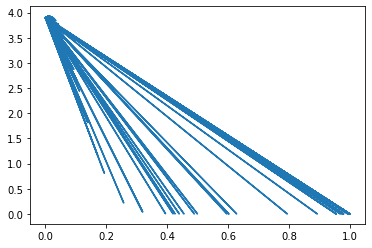

In [89]:
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.plot(MNB_predict[:,0], norm.pdf(MNB_predict[:,0], mean_0, std_0))

In [ ]:


#predicting the test dataset using Naive Bayes Algorithm
from sklearn import metrics

#Predicting
NB_predicted = MNB.predict(X_test)

print('---------------------------------------------------------------------------------------------\n')

print(NB_predicted[:100])

#Accuracy
NB_accuracy_score = metrics.accuracy_score(NB_predicted, Y_test)
print('----------------------------------------------------------------------------------------------\n')
print("Accuracy of the Naive Bayes Algorithm is",str('{:04.2f}'.format(NB_accuracy_score*100))+'%')

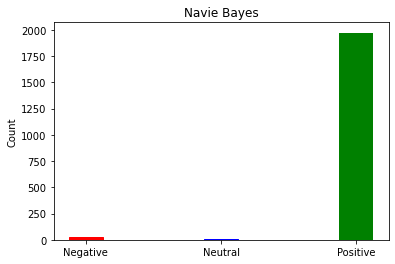

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
dl=pd.DataFrame({"rating":predicted})
count=dl.rating.value_counts()
bar=plt.bar(['Negative','Neutral','Positive'],count.sort_index(),color='green',width=0.25)
plt.title('Navie Bayes')
plt.ylabel('Count')
bar[0].set_color('r')
bar[1].set_color('b')
predict_proba(X)

In [73]:
#Kmeans Algorithm
from sklearn.cluster import KMeans
from sklearn import metrics
kmeans = KMeans(n_clusters=3, random_state=0,n_init=11).fit(X_train)
Acc=kmeans.predict(X_test)
accuracy_kmeans=metrics.accuracy_score(Acc,Y_test)
print(str('{:04.2f}'.format(accuracy_kmeans*100))+'%')

7.65%


1    1782
0     211
2       7
Name: rating, dtype: int64


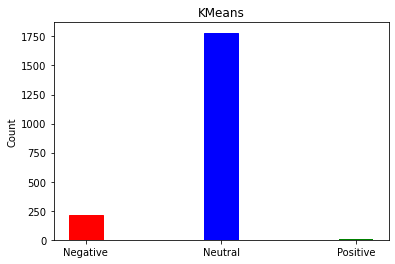

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
dl=pd.DataFrame({"rating":Acc})
count=dl.rating.value_counts()
print(count)
bar=plt.bar(['Negative','Neutral','Positive'],count.sort_index(),color='green',width=0.25)
plt.title('KMeans')
plt.ylabel('Count')
bar[0].set_color('r')
bar[1].set_color('b')

In [ ]:
#SVM Algorithm
from sklearn import svm
Svm=svm.SVC(kernel='poly', degree=3, C=1)
M=Svm.fit(X_train,Y_train)

In [ ]:
from sklearn import metrics
predicted2=M.predict(X_test)
accuracy=metrics.accuracy_score(predicted2,Y_test)
print(str('{:04.2f}'.format(accuracy*100))+'%')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
dl=pd.DataFrame({"rating":predicted2})
count=dl.rating.value_counts()
print(count)
bar=plt.bar(['Negative','Neutral','Positive'],count.sort_index(),color='green',width=0.25)
plt.title('KMeans')
plt.ylabel('Count')
bar[0].set_color('r')
bar[1].set_color('b')

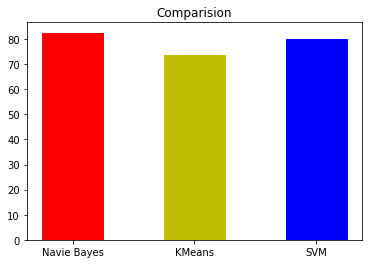

In [16]:
import matplotlib.pyplot as plt
comp=plt.bar(['Navie Bayes','KMeans','SVM'],[accuracy_score*100,accuracy_kmeans*100,accuracy*100],width=0.50)
plt.title('Comparision')
comp[0].set_color('r')
comp[1].set_color('y')
comp[2].set_color('b')